# Nitrogen Composition Prediction Project

## Introduction
The goal of this project is to predict the mass fraction of nitrogen in a nitrogen production system. We aim to build a reliable model to assist in optimizing nitrogen extraction based on key process variables.

## Problem Statement
The objective is to accurately predict the nitrogen gas composition based on input air flow, pressure, temperature, and compressed air temperature, ensuring optimization of nitrogen production.

## Dataset Description
The dataset contains process data from a nitrogen production plant, including variables such as inlet air flow, pressure, and temperature.

- **Features:**
    - `Inlet air - Std Ideal Liq Vol Flow`
    - `Inlet air - Pressure`
    - `Inlet air - Temperature`
    - `Compressed air - Temperature`
- **Target Variable:**
    - `Nitrogen gas - Master Comp Mass Frac (Nitrogen)`

## Initial Imports

In [3]:
# Import pandas and numpy
import pandas as pd
import numpy as np

## Data Loading

In [24]:
# Load the csv into a dataframe
data = pd.read_csv('./data/nitrogen.csv')

# Check the data
data.head()

,State,Inlet air - Std Ideal Liq Vol Flow,Inlet air - Pressure,Inlet air - Temperature,compressed air - Temperature,Nitrogen gas - Master Comp Mass Frac (Nitrogen)
0,Case 2,300,1.0,26,25,0.0
1,Case 3,300,1.0,27,25,0.0
2,Case 4,300,1.0,28,25,0.0
3,Case 5,300,1.0,29,25,0.0
4,Case 6,300,1.0,30,25,0.0


## Set the index

In [5]:
# Set the "State" column as the index
data.set_index('State', inplace=True)

## Expolore and Analyze the Data

In [8]:
# Check for missing values
print(data.isnull().sum())
print('---')
print('---')

# Check the data types
print(data.dtypes)
print('---')
print('---')

# Describe the data
print(data.describe())

Inlet air - Std Ideal Liq Vol Flow                 0
Inlet air - Pressure                               0
Inlet air - Temperature                            0
compressed air - Temperature                       0
Nitrogen gas - Master Comp Mass Frac (Nitrogen)    0
dtype: int64
---
---
Inlet air - Std Ideal Liq Vol Flow                   int64
Inlet air - Pressure                               float64
Inlet air - Temperature                              int64
compressed air - Temperature                         int64
Nitrogen gas - Master Comp Mass Frac (Nitrogen)    float64
dtype: object
---
---
       Inlet air - Std Ideal Liq Vol Flow  Inlet air - Pressure  \
count                         1878.000000           1878.000000   
mean                           399.893504              1.250053   
std                             60.638490              0.170766   
min                            300.000000              1.000000   
25%                            350.000000              1.10000

### Visualization

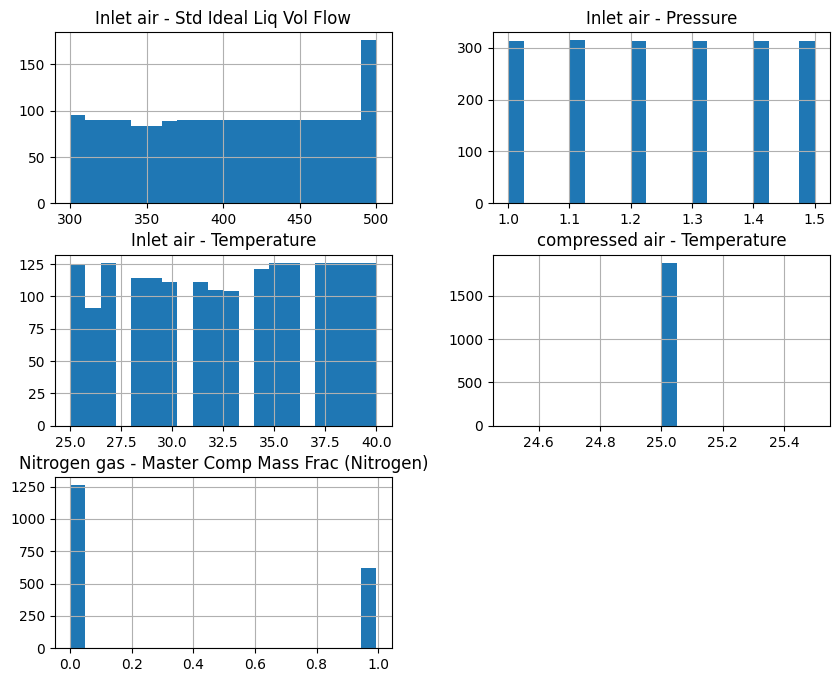

In [16]:
# Visualize distributions if needed (e.g., histograms)
import matplotlib.pyplot as plt

data.hist(bins=20, figsize=(10, 8))
plt.show()

## Simple Baseline Model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = data.drop(columns=['Nitrogen gas - Master Comp Mass Frac (Nitrogen)'])
y = data['Nitrogen gas - Master Comp Mass Frac (Nitrogen)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Make predictions
y_pred = baseline_model.predict(X_test)

## Evaluate the Model

In [18]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Baseline Model - Mean Squared Error: {mse}')
print(f'Baseline Model - R-squared: {r2}')

Baseline Model - Mean Squared Error: 0.07451868406014697
Baseline Model - R-squared: 0.6577342528066548


## Improve the Model

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Create and train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Model - Mean Squared Error: {mse_rf}')
print(f'Random Forest Model - R-squared: {r2_rf}')

Random Forest Model - Mean Squared Error: 5.585846240691579e-05
Random Forest Model - R-squared: 0.999743441009273


## Express the Solution

Feature Importances:
Inlet air - Temperature               0.684684
Inlet air - Std Ideal Liq Vol Flow    0.314843
Inlet air - Pressure                  0.000473
compressed air - Temperature          0.000000
dtype: float64


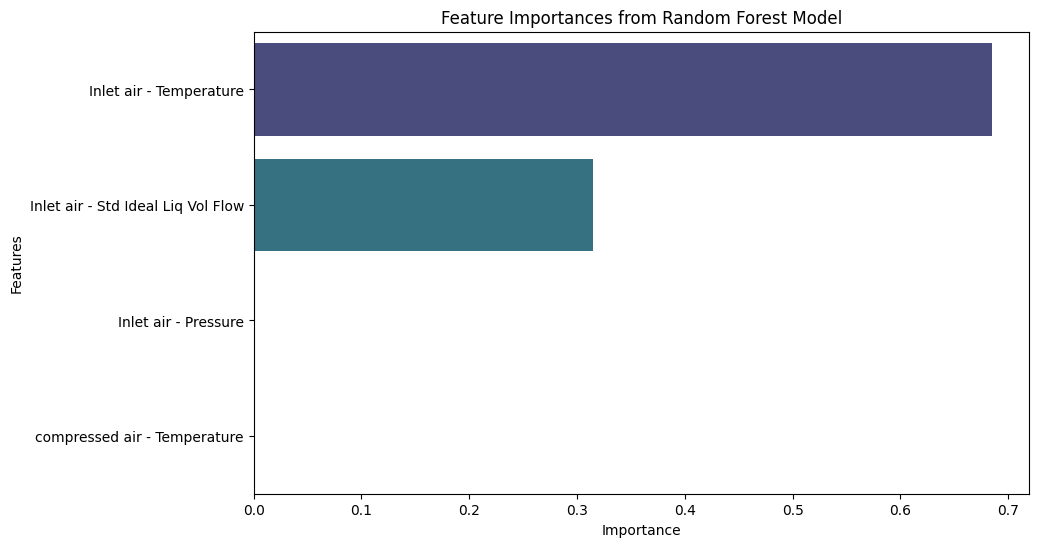

The best performing model is: Random Forest


In [23]:
import seaborn as sns

# Print out feature importances for the Random Forest model
importances = rf_model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("Feature Importances:")
print(feature_importance)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis', hue=feature_importance.index, dodge=False)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Summarize model performance
best_model = "Random Forest" if r2_rf > r2 else "Baseline Linear Regression"
print(f'The best performing model is: {best_model}')

## Save the Model

In [21]:
import joblib

# Save the best model
joblib.dump(rf_model, 'nitrogen_prediction_model.pkl')

['nitrogen_prediction_model.pkl']